In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("./dataset/Cancer_Data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df = df.drop(columns = ['Unnamed: 32', 'id'])

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
X = df.iloc[:,1:].values

In [9]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
mean = np.mean(X)

In [11]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [12]:
Scaled_X =  scaler.transform(X)

In [13]:
Scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [14]:
co_var = np.cov(Scaled_X.T)
co_var.shape

(30, 30)

In [15]:
co_var, co_var.shape

(array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
          9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
          6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
         -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
          6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
          2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
         -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
          2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
          1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
          7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
        [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
          3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
          3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
         -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
          2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
          1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
          9.14323671e-03,  5.45533955e-

In [16]:
e_values, e_vectors = np.linalg.eig(co_var)

In [17]:
e_values, e_vectors

(array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
        1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
        4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
        2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
        5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
        7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
        1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
        3.12142606e-02, 3.00256631e-02]),
 array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
          4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
          1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
          9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
          1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
          1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
         -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
         -2.11194013e-01, -1.31526

In [18]:
e_vectors.shape

(30, 30)

In [19]:
proportion_of_variance = np.round(e_values/sum(e_values) *100)

In [20]:
proportion_of_variance

array([44., 19.,  9.,  7.,  5.,  4.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [21]:
Y = np.dot(e_vectors.T,Scaled_X.T) 

In [22]:
Y.shape

(30, 569)

In [23]:
pd.DataFrame(Y)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
0,9.192837,2.387802,5.733896,7.122953,3.935302,2.380247,2.238883,2.143299,3.174924,6.351747,...,-1.089376,-0.481771,-4.870310,5.917613,8.741338,6.439315,3.793382,1.256179,10.374794,-5.475243
1,1.948583,-3.768172,-1.075174,10.275589,-1.948072,3.949929,-2.690031,2.340244,3.391813,7.727174,...,1.292848,-0.178020,-2.131106,3.482637,-0.573855,-3.576817,-3.584048,-1.902297,1.672010,-0.670637
2,-1.123166,-0.529293,-0.551748,-3.232790,1.389767,-2.934877,-1.639913,-0.871947,-3.119986,-4.341916,...,1.429379,1.032108,3.414189,-3.262792,0.897090,2.459487,2.088476,0.562731,-1.877029,1.490443
3,3.633731,1.118264,0.912083,0.152547,2.940639,0.941037,0.149340,-0.127043,-0.601297,-3.375202,...,-3.372136,-2.010280,-5.133988,-3.917585,0.385150,1.177314,-2.506028,-2.089227,-2.356031,-2.299157
4,1.195110,-0.621775,0.177086,2.960878,-0.546747,1.056042,-0.040360,1.427437,1.522290,-1.710263,...,-0.947342,-0.327103,0.488921,-1.716382,-0.679043,0.074824,0.510723,-1.809991,0.033742,0.184703
5,1.411424,0.028656,0.541452,3.053422,-1.226495,-0.451039,-0.128948,-1.257039,0.559545,-0.723909,...,-1.725870,-0.992062,-1.110792,1.013599,-0.300753,-2.375193,-0.246710,-0.534447,0.567936,1.617837
6,-2.159370,-0.013358,0.668166,-1.429911,0.936213,-0.490445,0.301567,-0.974100,0.215104,-2.519840,...,0.353975,0.048546,-0.488371,-0.271442,-0.094824,0.596130,0.716326,0.192758,-0.223082,-1.698952
7,0.398407,-0.240988,-0.097374,-1.059565,-0.636376,0.165444,-0.083698,0.653338,0.687341,-0.365149,...,1.164340,0.195221,1.289284,-0.091963,0.734082,0.035471,1.113360,-0.341887,0.280239,-1.046354
8,-0.157118,-0.711905,0.024066,-1.405440,-0.263805,-0.133473,-0.080025,0.248184,0.511924,-0.717397,...,-0.207495,-0.325865,-1.390479,0.372476,0.831093,0.987929,-0.105207,0.393917,-0.542035,0.374101
9,-0.877402,1.106995,0.454275,-1.116975,0.377704,-0.530431,0.219143,1.000586,0.029187,-1.165631,...,-1.391708,0.429072,-1.746663,-0.630423,0.450639,0.256989,-0.108632,0.520877,-0.089296,-0.047726


In [24]:
color_mapping = {'B': 'blue', 'M': 'green'}
colors = [color_mapping[t] for t in df['diagnosis']]

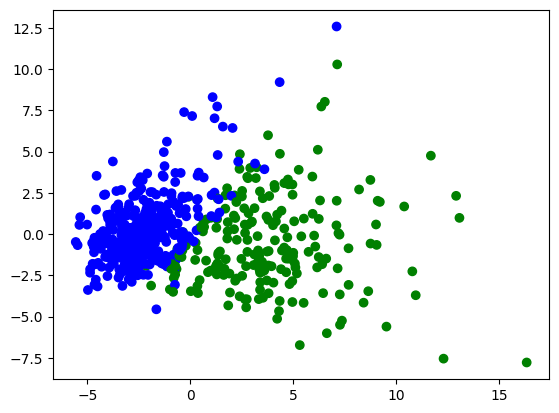

In [25]:
plt.scatter(Y.T[:,0],Y.T[:,1], c= colors)

## using the standard library:

In [26]:

from sklearn.decomposition import PCA
# Set the n_components=3
principal=PCA()
principal.fit(Scaled_X)
Y_library = principal.transform(Scaled_X)

In [27]:
Y_library.shape

(569, 30)

In [28]:
pd.DataFrame(Y_library)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


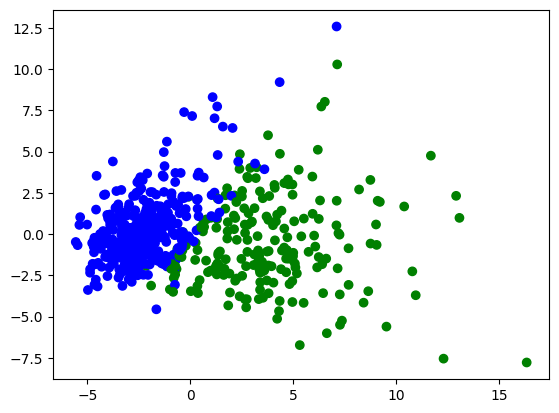

In [29]:
plt.scatter(Y_library.T[0],Y_library.T[1], c= colors)

In [30]:
principal.explained_variance_ratio_ * 100, np.cumsum(principal.explained_variance_ratio_ * 100)

(array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
        5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
        1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
        8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
        1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
        9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
        5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
        2.49601032e-03, 4.43482743e-04]),
 array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
         84.73427432,  88.75879636,  91.00953007,  92.59825387,
         93.98790324,  95.15688143,  96.13660042,  97.00713832,
         97.81166331,  98.33502905,  98.64881227,  98.91502161,
         99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
         99.65711397,  99.74857865,  99.82971477,  99.88989813,
         99.94150237,  99.96876117,  99.99176271,  99.99706051,
      

In [31]:
explained_var_library = principal.explained_variance_ratio_ * 100
explained_var_cum_library = np.cumsum(principal.explained_variance_ratio_ * 100)

In [32]:
explained_var_library

array([4.42720256e+01, 1.89711820e+01, 9.39316326e+00, 6.60213492e+00,
       5.49576849e+00, 4.02452204e+00, 2.25073371e+00, 1.58872380e+00,
       1.38964937e+00, 1.16897819e+00, 9.79718988e-01, 8.70537901e-01,
       8.04524987e-01, 5.23365745e-01, 3.13783217e-01, 2.66209337e-01,
       1.97996793e-01, 1.75395945e-01, 1.64925306e-01, 1.03864675e-01,
       9.99096464e-02, 9.14646751e-02, 8.11361259e-02, 6.01833567e-02,
       5.16042379e-02, 2.72587995e-02, 2.30015463e-02, 5.29779290e-03,
       2.49601032e-03, 4.43482743e-04])

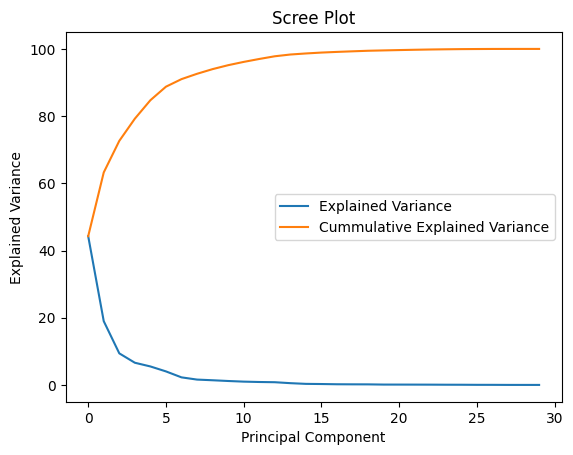

In [33]:
plt.plot(np.arange(30),explained_var_library)
plt.plot(np.arange(30),explained_var_cum_library)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
legend_class = ["Explained Variance", "Cummulative Explained Variance"]
plt.legend(labels = legend_class)
plt.show()